In [4]:
import numpy as np
import matplotlib.pyplot as plt


### Question 1


Find the global minimum of the function $$f(x) = 100(x_2 - x_1^2)^2 + (1-x_1)^2$$ by different learning algorithms and analyze, numerically and compare the
performances of Adam, RMS prop, Ada-Grad for different learning rates and initializations and draw the mean-square error for each learning rate and initialization you have considered within the scope of this homework.

In [5]:
def f(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

def f_gradient(x):
    return np.array([400 * (x[0]**2 - x[1]) * x[0] + 2 * (x[0] -1), 200 * (x[1] - x[0]**2)], dtype=np.float64)

In [31]:
l_rates = [0.001]
init_std = [0.01]

#### AdaGrad

One of the main problems with vanilla gradient descent is that the step size is the same for all features. However, in the search space some features have greater gradients in comparison to others. This phenomenon results in features with greater gradients dominating the optimization process meanwhile others suffer from small gradients. Hence, process takes very long time. AdaGrad come up with a remedy for the problem that all features sharing the same step size by adjusting the stepsize for each feature. Underlying idea is that it is possible that better performance can be achieved using a step size that is tailored to each variable, allowing larger movements in dimensions with a consistently steep gradient and smaller movements in dimensions with less steep gradients. From the probabilistic perspective, the algorithm tries to have normalized steps for each feature.

In [6]:

def AdaGrad(G, grad):
    G += grad * grad
    return grad / (np.sqrt(G) + 1e-8)


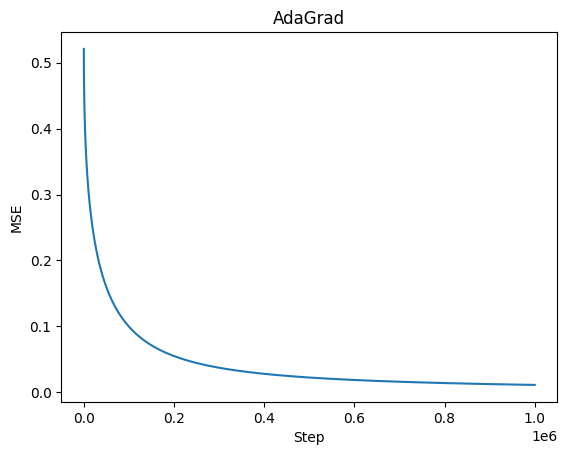

In [21]:
mse = []
for l_r in l_rates:
    for init in init_std:
        
        mse_total = 0
        x = np.random.normal(scale=init, size=(2,))
        G = np.zeros_like(x)
        for k in range(1, 1000000):
            dx = f_gradient(x)
            update = l_r * AdaGrad(G, dx)
            x = x - update
            step_mse = (1/2) * f(x)**2

            mse_total += step_mse

            mse.append(mse_total/k)
            if np.absolute(update).max() < 1e-8:
                break
            
plt.title("AdaGrad")
plt.ylabel("MSE")
plt.xlabel("Step")
plt.plot(mse)
plt.show()

#### RMSprop

In AdaGrad, we observed that having different step sizes for each feature can help the optimization process. This is due to feature spaces having distinct curvatures which necessitates different step sizes. However, over the course of tranining step sizes diminish since we cumulatively collect squared gradients. In the convex optimization, this makes a lot of sense, because when we approach minina we want to slow down. In non-convex case it’s bad as we can get stuck on saddle point. Hence, RMSprop addresses this issue by making use of maving averages of squared gradients rather than continuosly accumulating them.

In [11]:
def RMSprop(G, grad, gamma=0.1):
    G = (1-gamma) * G + gamma * grad * grad
    return grad / (np.sqrt(G) + 1e-8)

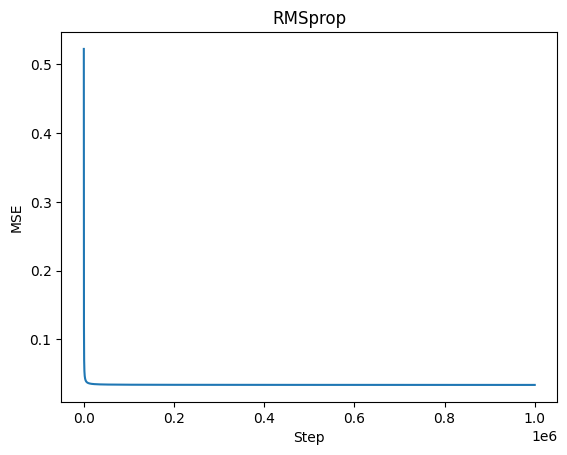

In [20]:
mse = []
for l_r in l_rates:
    for init in init_std:
        
        mse_total = 0
        x = np.random.normal(scale=init, size=(2,))
        G = np.zeros_like(x)
        for k in range(1, 1000000):
            dx = f_gradient(x)
            update = l_r * RMSprop(G, dx)
            x = x - update
            step_mse = (1/2) * f(x)**2

            mse_total += step_mse
           
            mse.append(mse_total/k)
            if np.absolute(update).max() < 1e-7:
                break

plt.title("RMSprop")
plt.ylabel("MSE")
plt.xlabel("Step")
plt.plot(mse)
plt.show()

#### Adam

Both RMSprop and AdaGrad make use of second moment of the gradients but as in the case of momentum and nesterov updates we have seen that first moments can be helpful during the optimization process. Therefore, Adam optimizer combines the ideas of RMSprop and SGD with momentum. Adam employs the moving avreage of both first and second moments of gradients. This can be given as follows:

![alt text](Images/adam1.png "Title")

Since m and v are  estimates of first and second moments, we want to have the following property:

![alt text](Images/adam2.png "Title")

However, as it turns out m and v are biased estimations of first and second moments. This can be calculated as follows:

![alt text](Images/adam3.png "Title")

Therefore, we apply a bias correction in order to obtain the m and v to be equal to first and secon moments.

![alt text](Images/adam4.png "Title")

Final update equation becomes the following formula:

![alt text](Images/adam5.png "Title")

In [27]:
def Adam(step, m, v, grad, beta_1=0.99, beta_2=0.99):
    m = beta_1 * m + (1 - beta_1) * grad
    v = beta_2 * v + (1 - beta_2) * grad * grad
    m_hat = m / (1 - np.power(beta_1, step))
    v_hat = v / (1 - np.power(beta_2, step))
    return m_hat / (np.sqrt(v_hat) + 1e-8)

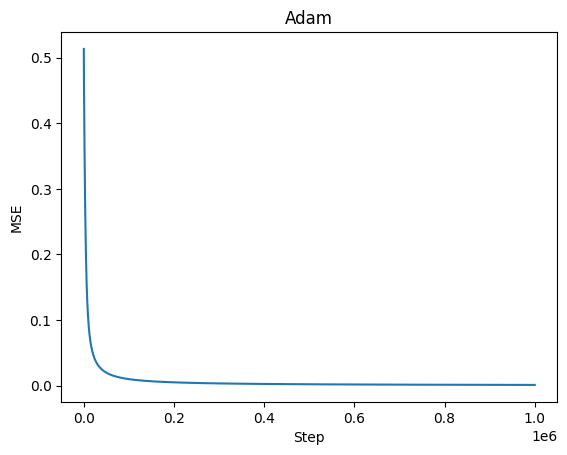

In [42]:
mse = []
for l_r in l_rates:
    for init in init_std:
        
        mse_total = 0
        x = np.random.normal(scale=init, size=(2,))
        m = np.zeros_like(x)
        v = np.zeros_like(x)
        for k in range(1, 1000000):
            dx = f_gradient(x)
            update = l_r * Adam(k, m, v, dx)
            x = x - update
            step_mse = (1/2) * f(x)**2

            mse_total += step_mse
           
            mse.append(mse_total/k)
            if np.absolute(update).max() < 1e-5:
                break

plt.title("Adam")
plt.ylabel("MSE")
plt.xlabel("Step")
plt.plot(mse)
plt.show()

In [36]:
l_rates = [0.1, 0.001]
init_std = [1, 0.1]

[0.99889021 0.99777785]
[0.99940721 0.99881246]
[0.41491759 0.17863389]
[0.32496586 0.10034371]


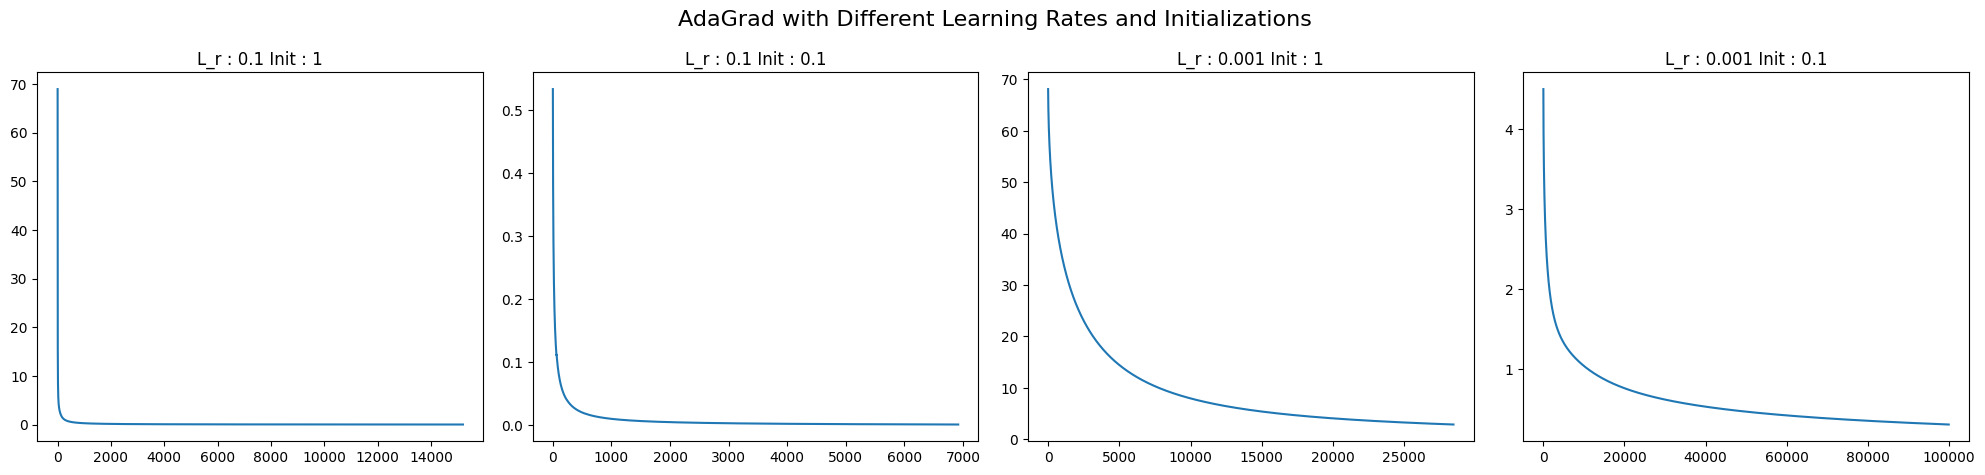

In [37]:
mse_scores = {}
for l_r in l_rates:
    for init in init_std:
        mse = []       
        mse_total = 0
        x = np.random.normal(scale=init, size=(2,))
        G = np.zeros_like(x)
        for k in range(1, 100000):
            dx = f_gradient(x)
            update = l_r * AdaGrad(G, dx)
            x = x - update
            step_mse = (1/2) * f(x)**2

            mse_total += step_mse

            mse.append(mse_total/k)
            if np.absolute(update).max() < 1e-6:
                break
        print(x)
        mse_scores[str(l_r)+" "+str(init)] = mse.copy()

fig, ax = plt.subplots(1, 4)
fig.suptitle("AdaGrad with Different Learning Rates and Initializations", fontsize=16)
for i in range(2):
    for j in range(2):
        ax[2*i + j].set_title(f"L_r : {l_rates[i]} Init : {init_std[j]}")
        ax[2*i + j].plot(mse_scores[str(l_rates[i])+" "+str(init_std[j])])

fig.set_figwidth(20)
fig.tight_layout()
plt.show()

[1.25244107 1.51460876]
[ 0.19151077 -0.28434815]
[0.56266945 0.31241283]
[0.53609913 0.2894745 ]


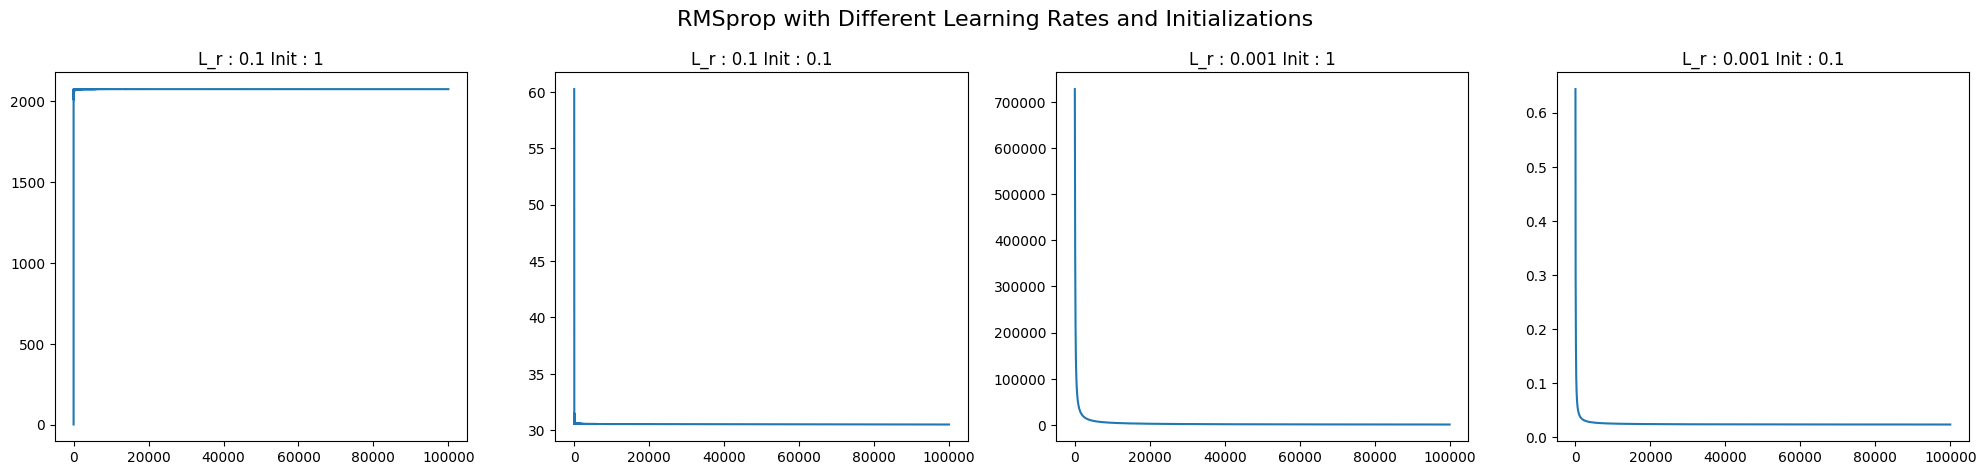

In [38]:
mse_scores = {}
for l_r in l_rates:
    for init in init_std:
        mse = []
        mse_total = 0
        x = np.random.normal(scale=init, size=(2,))
        G = np.zeros_like(x)
        for k in range(1, 100000):
            dx = f_gradient(x)
            update = l_r * RMSprop(G, dx)
            x = x - update
            step_mse = (1/2) * f(x)**2

            mse_total += step_mse
           
            mse.append(mse_total/k)
            if np.absolute(update).max() < 1e-6:
                break
        print(x)
        mse_scores[str(l_r)+" "+str(init)] = mse.copy()

fig, ax = plt.subplots(1, 4)
fig.suptitle("RMSprop with Different Learning Rates and Initializations", fontsize=16)
for i in range(2):
    for j in range(2):
        ax[2*i + j].set_title(f"L_r : {l_rates[i]} Init : {init_std[j]}")
        ax[2*i + j].plot(mse_scores[str(l_rates[i])+" "+str(init_std[j])])

fig.set_figwidth(20)
fig.tight_layout()
plt.show()

[-0.82949764  0.67876996]
[0.31896428 0.10241979]
[0.94719804 0.89690006]
[0.94699244 0.89651005]


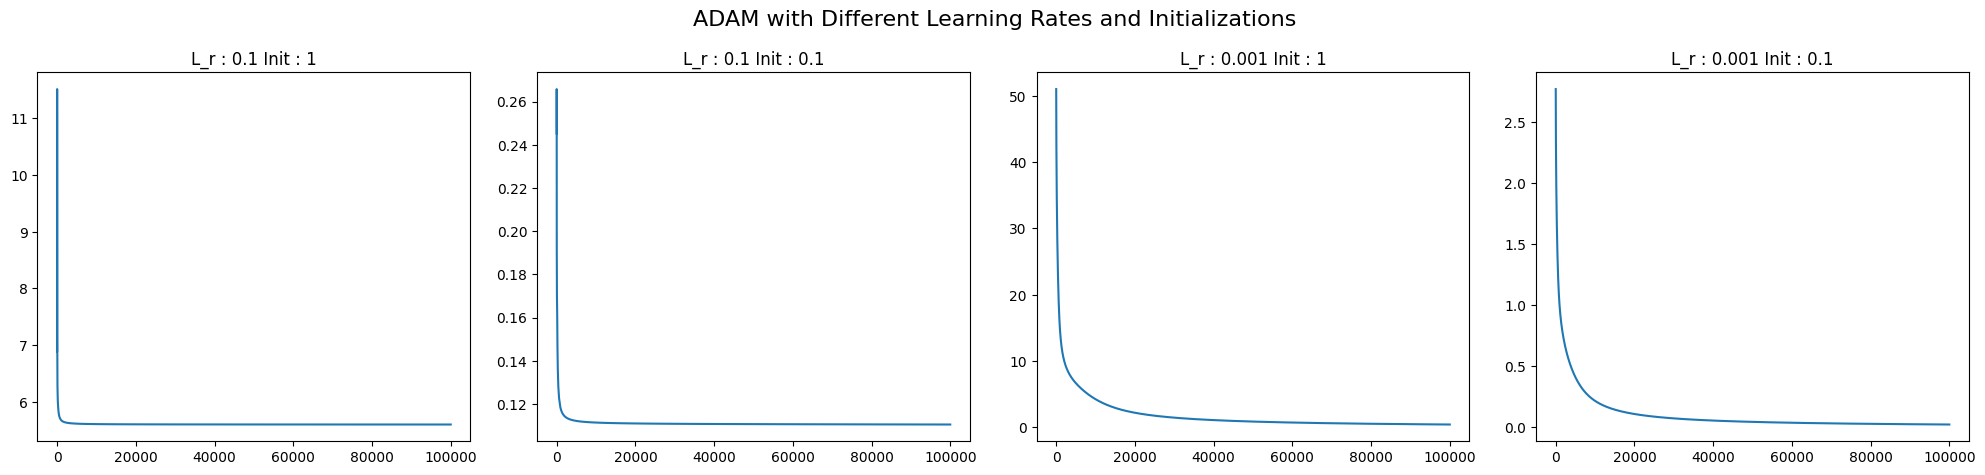

In [39]:
mse_scores = {}
for l_r in l_rates:
    for init in init_std:
        mse = []
        mse_total = 0
        x = np.random.normal(scale=init, size=(2,))
        m = np.zeros_like(x)
        v = np.zeros_like(x)
        for k in range(1, 100000):
            dx = f_gradient(x)
            update = l_r * Adam(k, m, v, dx)
            x = x - update
            step_mse = (1/2) * f(x)**2

            mse_total += step_mse
           
            mse.append(mse_total/k)
            if np.absolute(update).max() < 1e-6:
                break
        print(x)
        mse_scores[str(l_r)+" "+str(init)] = mse.copy()

fig, ax = plt.subplots(1, 4)
fig.suptitle("ADAM with Different Learning Rates and Initializations", fontsize=16)
for i in range(2):
    for j in range(2):
        ax[2*i + j].set_title(f"L_r : {l_rates[i]} Init : {init_std[j]}")
        ax[2*i + j].plot(mse_scores[str(l_rates[i])+" "+str(init_std[j])])

fig.set_figwidth(20)
fig.tight_layout()
plt.show()

### Question 2

For different noise variance, please repeat the part 1 and comment the performances of the optimizers under noise or perturbation.

In [40]:
l_rates = [0.01, 0.1]
init_std = [0.01, 1]
perturbation = [1, .1]

[0.7460095  0.55477883]
[1.04104572 1.08412832]
[1.0174469  1.03631983]
[1.11117241 1.23478554]
[0.94454597 0.89199666]
[0.88281955 0.76314456]
[0.99738962 0.99463629]
[0.81695389 0.66635159]


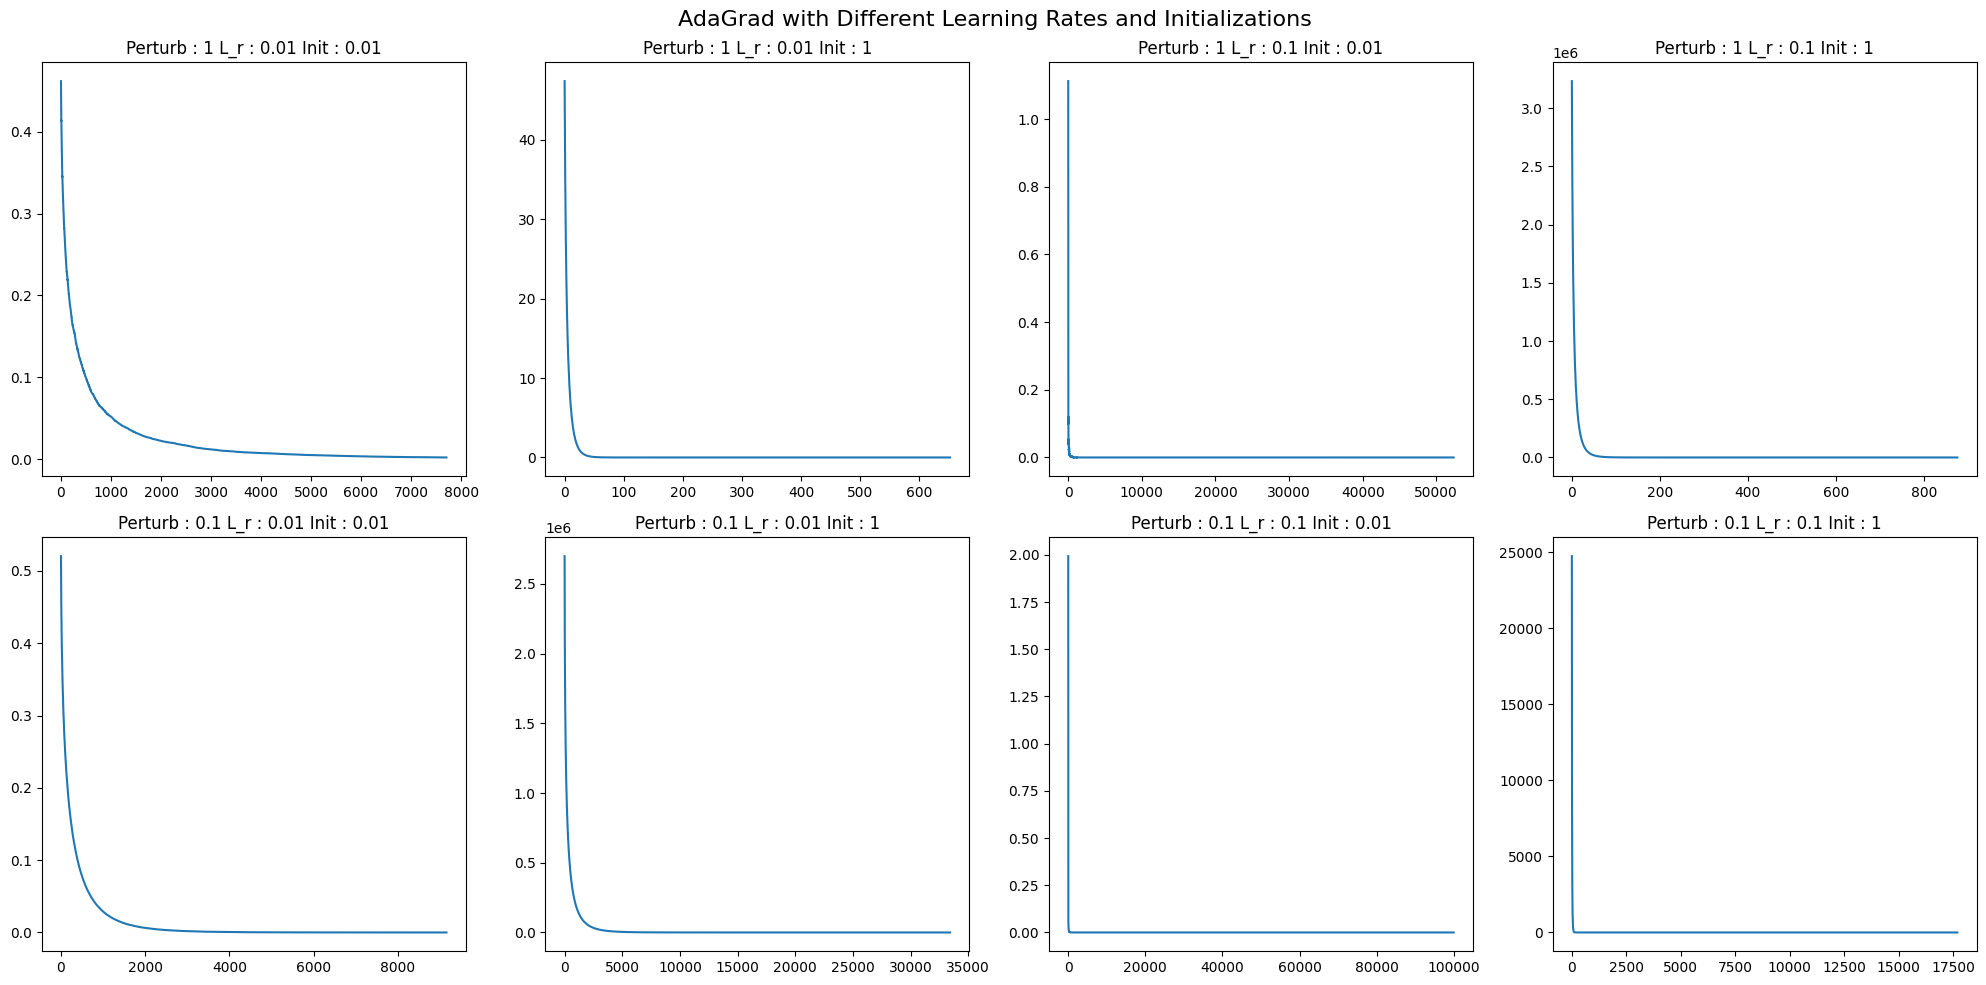

In [41]:
mse_scores = {}
for perturb in perturbation:
    for l_r in l_rates:
        for init in init_std:
            mse = []       
            mse_total = 0
            x = np.random.normal(scale=init, size=(2,))
            G = np.zeros_like(x)
            for k in range(1, 100000):
                dx = f_gradient(x)
                dx += np.random.normal(0, perturb, size=dx.shape)
                update = l_r * AdaGrad(G, dx)
                x = x - update
                step_mse = (1/2) * f(x)**2

                mse_total += step_mse

                mse.append(step_mse)
                if np.absolute(update).max() < 1e-6:
                    break
            print(x)
            mse_scores[str(perturb)+" "+str(l_r)+" "+str(init)] = mse.copy()

fig, ax = plt.subplots(2, 4)
fig.suptitle("AdaGrad with Different Learning Rates and Initializations", fontsize=16)
for k in range(2):
    for i in range(2):
        for j in range(2):
            ax[k, 2*i + j].set_title(f"Perturb : {perturbation[k]} L_r : {l_rates[i]} Init : {init_std[j]}")
            ax[k, 2*i + j].plot(mse_scores[str(perturbation[k])+" "+str(l_rates[i])+" "+str(init_std[j])])

fig.set_figwidth(20)
fig.set_figheight(10)
fig.tight_layout()
plt.show()

[0.65887686 0.47792342]
[-1.00254901  0.98011916]
[-0.31681746  0.31224642]
[-0.44859683 -0.20352777]
[0.17621026 0.03963645]
[0.72749051 0.45568418]
[0.31538836 0.3167565 ]
[-1.49747399  1.58636133]


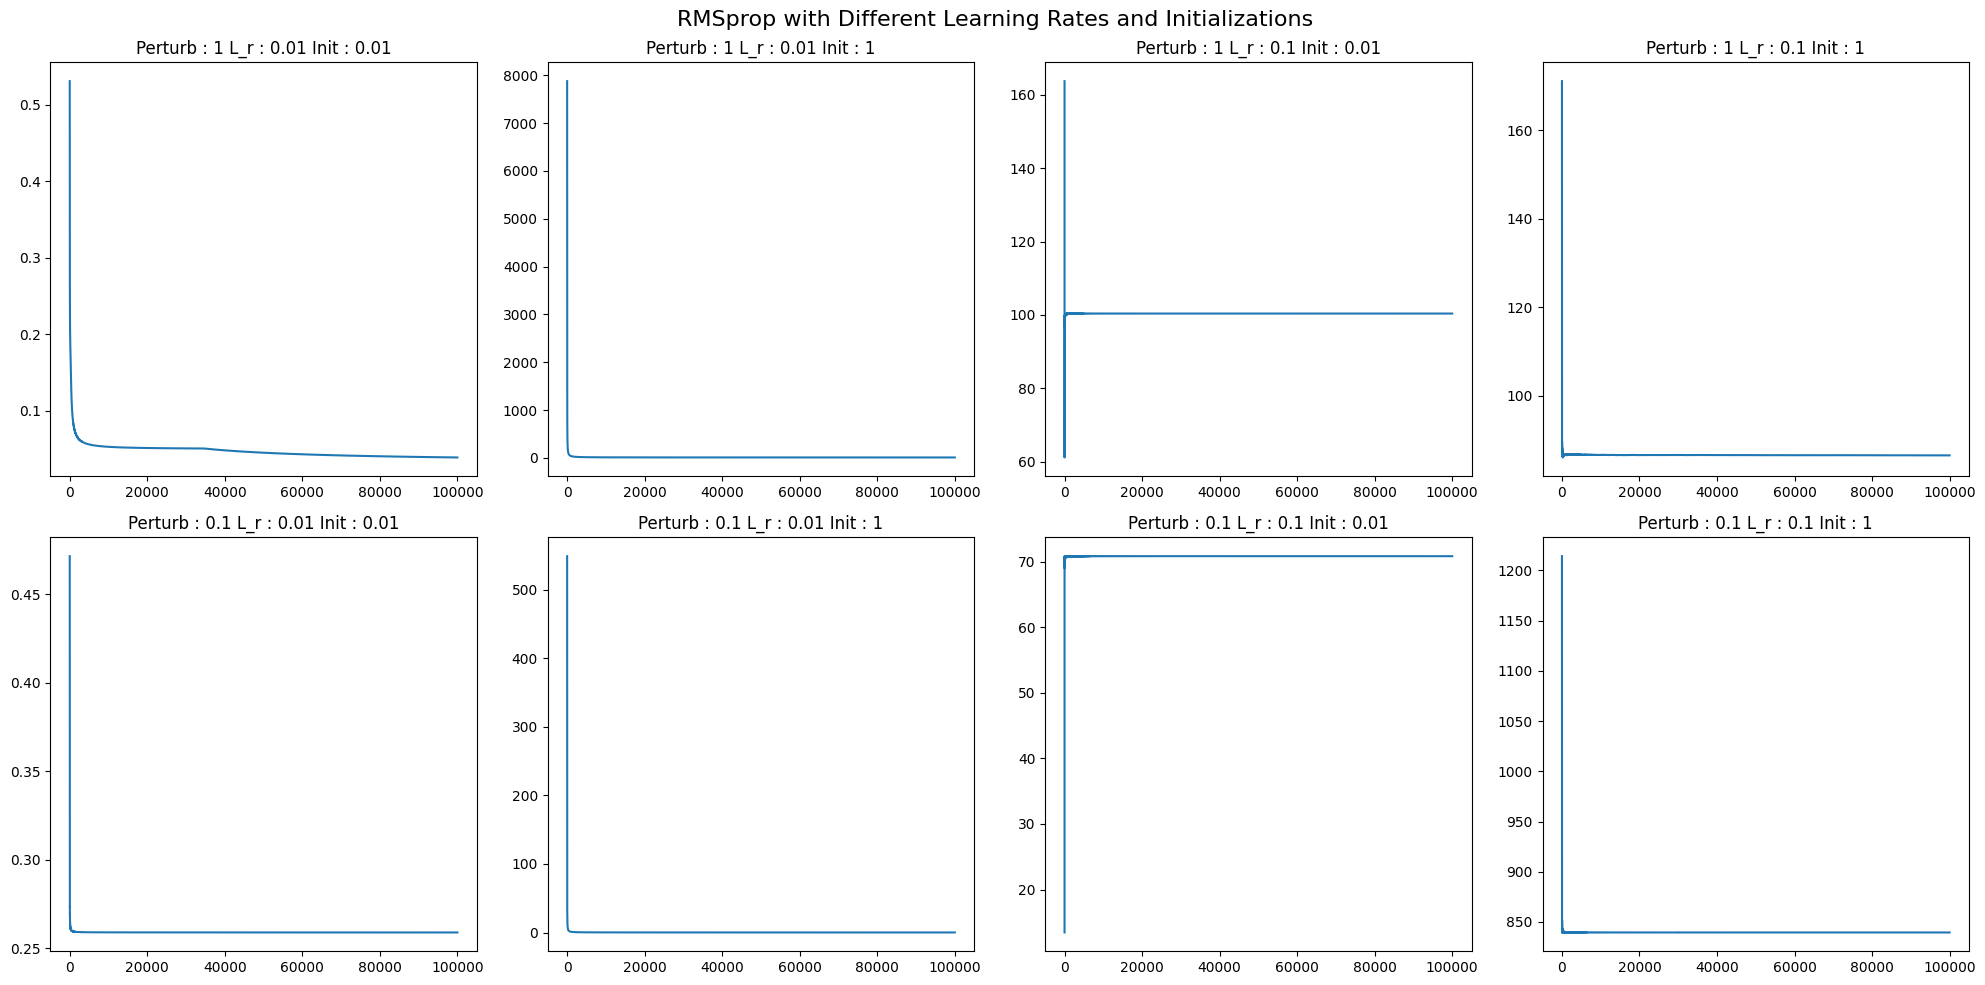

In [44]:
mse_scores = {}
for perturb in perturbation:
    for l_r in l_rates:
        for init in init_std:
            mse = []
            mse_total = 0
            x = np.random.normal(scale=init, size=(2,))
            G = np.zeros_like(x)
            for k in range(1, 100000):
                dx = f_gradient(x)
                dx += np.random.normal(0, perturb, size=dx.shape)
                update = l_r * RMSprop(G, dx)
                x = x - update
                step_mse = (1/2) * f(x)**2

                mse_total += step_mse
            
                mse.append(mse_total/k)
                if np.absolute(update).max() < 1e-6:
                    break
            print(x)
            mse_scores[str(perturb)+" "+str(l_r)+" "+str(init)] = mse.copy()

fig, ax = plt.subplots(2, 4)
fig.suptitle("RMSprop with Different Learning Rates and Initializations", fontsize=16)
for k in range(2):
    for i in range(2):
        for j in range(2):
            ax[k, 2*i + j].set_title(f"Perturb : {perturbation[k]} L_r : {l_rates[i]} Init : {init_std[j]}")
            ax[k, 2*i + j].plot(mse_scores[str(perturbation[k])+" "+str(l_rates[i])+" "+str(init_std[j])])

fig.set_figwidth(20)
fig.set_figheight(10)
fig.tight_layout()
plt.show()

[1.02589999 1.04962022]
[0.96367617 0.92851197]
[1.0315999  1.04618227]
[0.98336155 0.97616516]
[0.99014185 0.97858483]
[0.9974077  0.99634046]
[0.38262632 0.13136763]
[0.38743696 0.13569468]


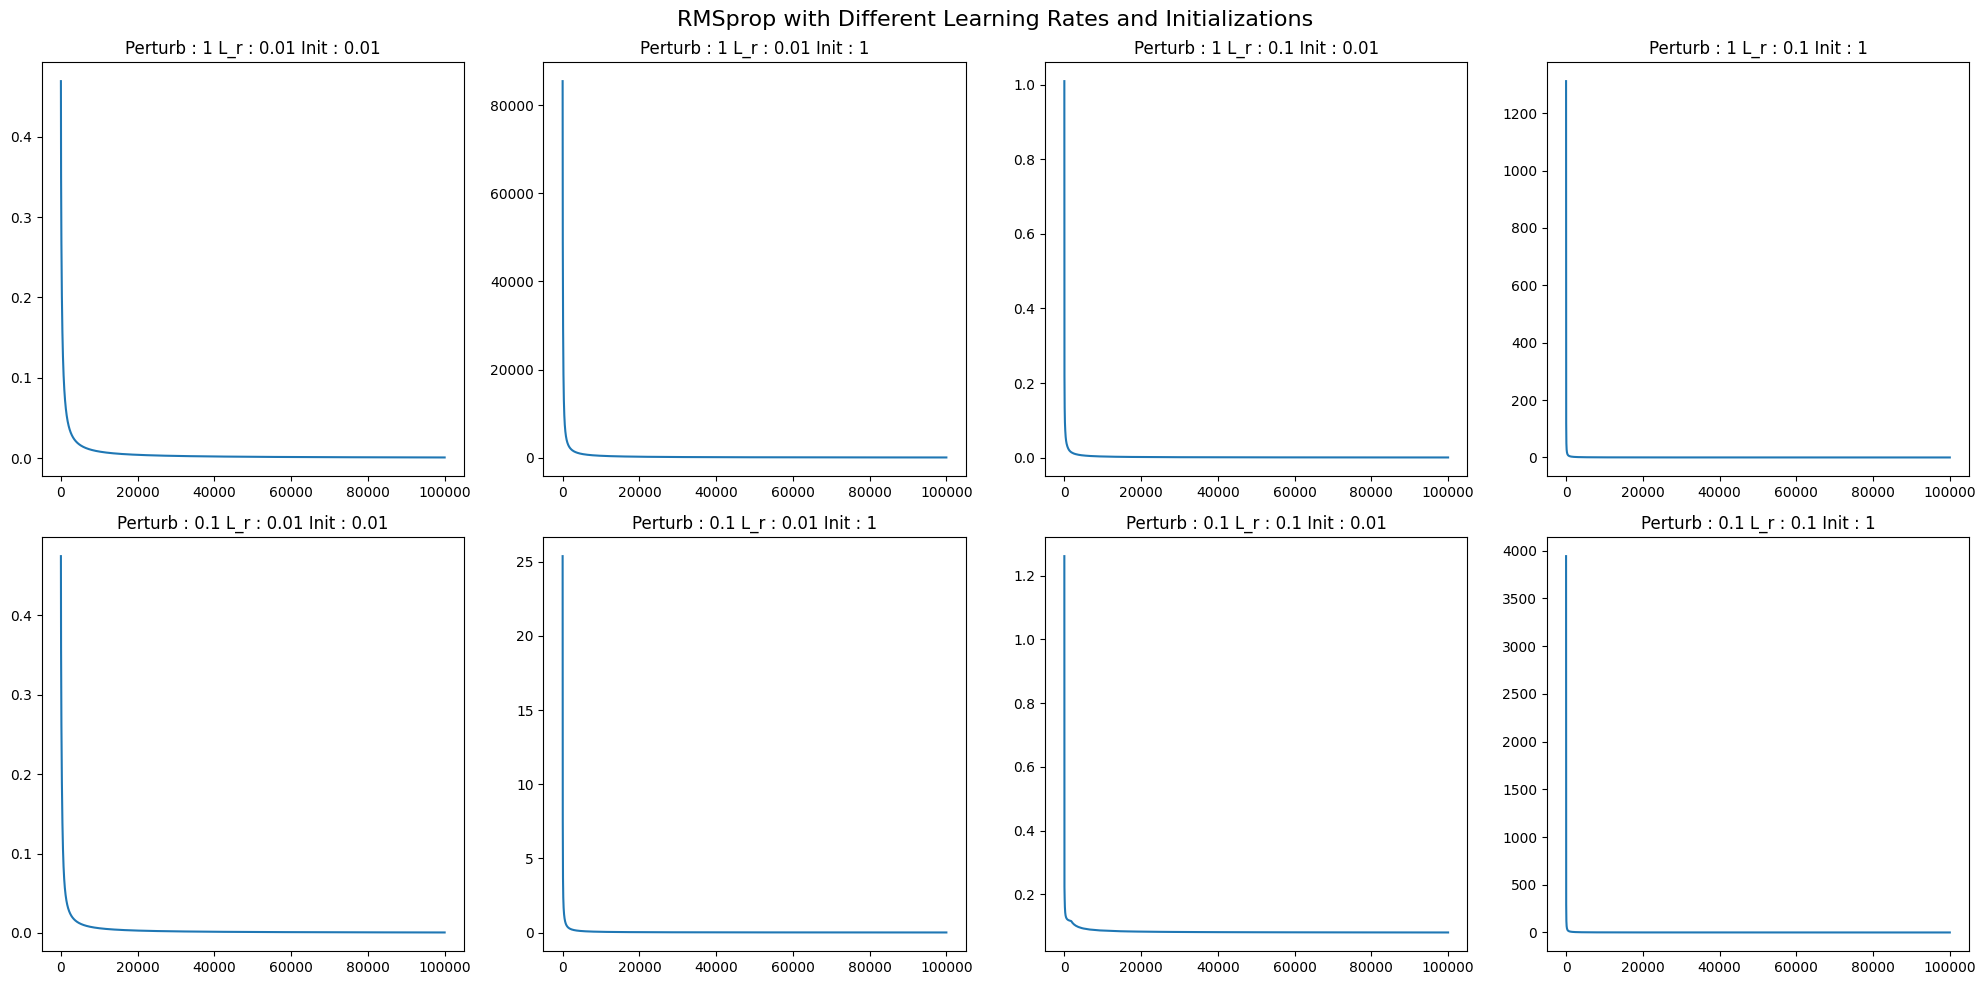

In [46]:
mse_scores = {}
for perturb in perturbation:
    for l_r in l_rates:
        for init in init_std:
            mse = []
            mse_total = 0
            x = np.random.normal(scale=init, size=(2,))
            m = np.zeros_like(x)
            v = np.zeros_like(x)
            for k in range(1, 100000):
                dx = f_gradient(x)
                dx += np.random.normal(0, perturb, size=dx.shape)
                update = l_r * Adam(k, m, v, dx)
                x = x - update
                step_mse = (1/2) * f(x)**2

                mse_total += step_mse
            
                mse.append(mse_total/k)
                if np.absolute(update).max() < 1e-6:
                    break
            print(x)
            mse_scores[str(perturb)+" "+str(l_r)+" "+str(init)] = mse.copy()

fig, ax = plt.subplots(2, 4)
fig.suptitle("RMSprop with Different Learning Rates and Initializations", fontsize=16)
for k in range(2):
    for i in range(2):
        for j in range(2):
            ax[k, 2*i + j].set_title(f"Perturb : {perturbation[k]} L_r : {l_rates[i]} Init : {init_std[j]}")
            ax[k, 2*i + j].plot(mse_scores[str(perturbation[k])+" "+str(l_rates[i])+" "+str(init_std[j])])

fig.set_figwidth(20)
fig.set_figheight(10)
fig.tight_layout()
plt.show()